In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
air = pd.read_csv("train.csv", index_col = 0)
air

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
air.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [4]:
air.tail(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103894,86549,Male,Loyal Customer,26,Business travel,Business,712,4,4,4,...,5,3,4,4,3,4,5,17,26.0,satisfied
103895,66030,Female,disloyal Customer,24,Business travel,Eco,1055,1,1,1,...,1,3,3,5,5,4,1,13,10.0,neutral or dissatisfied
103896,71445,Male,Loyal Customer,57,Business travel,Eco,867,4,5,5,...,4,3,4,3,1,3,4,0,0.0,neutral or dissatisfied
103897,102203,Female,Loyal Customer,60,Business travel,Business,1599,5,5,5,...,4,4,4,4,4,4,4,9,7.0,satisfied
103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,3,...,2,4,3,4,2,4,2,0,0.0,neutral or dissatisfied
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [5]:
air.nunique()

id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              446
Arrival Delay in Minutes        

In [6]:
air.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [7]:
air.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [8]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [9]:
air.shape

(103904, 24)

In [10]:
air.duplicated().sum()

0

In [ ]:
corr = air.corr()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = True, cmap = 'Blues')
plt.show()

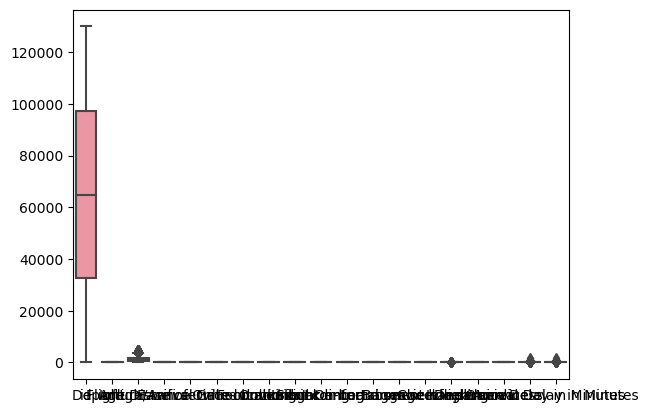

In [11]:
sns.boxplot(data = air)
plt.show()

In [ ]:
sns.boxplot(data = air, y = 'Flight Distance')

In [ ]:
sns.boxplot(data = air, y = 'Checkin service') 

In [ ]:
sns.boxplot(data = air, y = 'Departure Delay in Minutes')  #14529

In [12]:
q1 = air['Departure Delay in Minutes'].quantile(0.50)
q3 = air['Departure Delay in Minutes'].quantile(0.75)

In [13]:
iqr=q3-q1
iqr

12.0

In [14]:
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)

In [15]:
upper=air[air['Departure Delay in Minutes']>q3+1.5*iqr]
lower=air[air['Departure Delay in Minutes']<q1-1.5*iqr]
(upper.count()+lower.count())

id                                   14529
Gender                               14529
Customer Type                        14529
Age                                  14529
Type of Travel                       14529
Class                                14529
Flight Distance                      14529
Inflight wifi service                14529
Departure/Arrival time convenient    14529
Ease of Online booking               14529
Gate location                        14529
Food and drink                       14529
Online boarding                      14529
Seat comfort                         14529
Inflight entertainment               14529
On-board service                     14529
Leg room service                     14529
Baggage handling                     14529
Checkin service                      14529
Inflight service                     14529
Cleanliness                          14529
Departure Delay in Minutes           14529
Arrival Delay in Minutes             14428
satisfactio

<Axes: ylabel='Departure Delay in Minutes'>

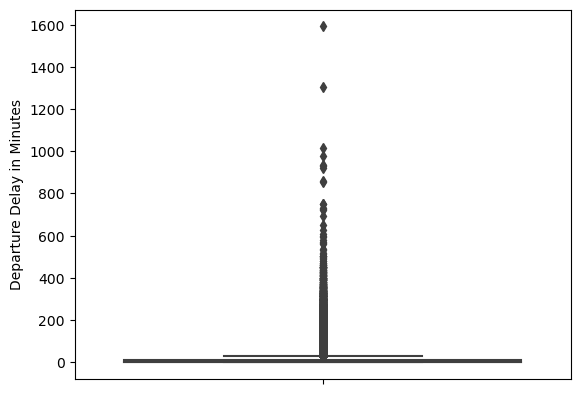

In [16]:
sns.boxplot(data = air, y = 'Departure Delay in Minutes')  #14529

### One Hot Encoding

In [17]:
Air = air.drop('satisfaction', axis = 1)
Air

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,4,3,4,4,5,5,25,18.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,1,5,3,1,4,1,1,6.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,2,3,1,4,2,3,2,3,0.0
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,5,4,0,0.0
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,5,4,3,2,4,5,5,4,7,14.0
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,1,4,5,1,5,4,1,0,0.0


In [18]:
dum_Air = pd.get_dummies(Air, drop_first = True)
dum_Air

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,70172,13,460,3,4,3,1,5,3,5,...,4,5,5,25,18.0,True,False,True,False,True
1,5047,25,235,3,2,3,3,1,3,1,...,1,4,1,1,6.0,True,True,False,False,False
2,110028,26,1142,2,2,2,2,5,5,5,...,4,4,5,0,0.0,False,False,False,False,False
3,24026,25,562,2,5,5,5,2,2,2,...,1,4,2,11,9.0,False,False,False,False,False
4,119299,61,214,3,3,3,3,4,5,5,...,3,3,3,0,0.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,...,2,3,2,3,0.0,False,True,False,True,False
103900,73097,49,2347,4,4,4,4,2,4,5,...,5,5,4,0,0.0,True,False,False,False,False
103901,68825,30,1995,1,1,1,3,4,1,5,...,5,5,4,7,14.0,True,True,False,False,False
103902,54173,22,1000,1,1,1,5,1,1,1,...,5,4,1,0,0.0,False,True,False,True,False


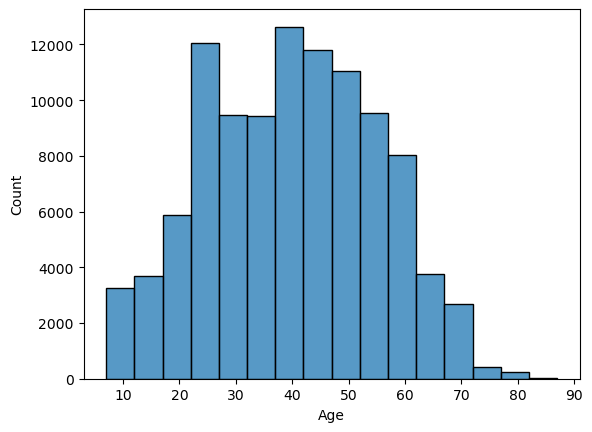

In [28]:
sns.histplot(data = air, x= 'Age', binwidth = 5)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

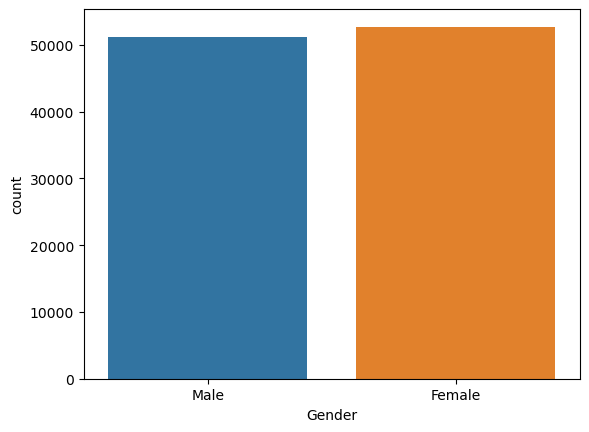

In [32]:
sns.countplot(data = air,x ='Gender')

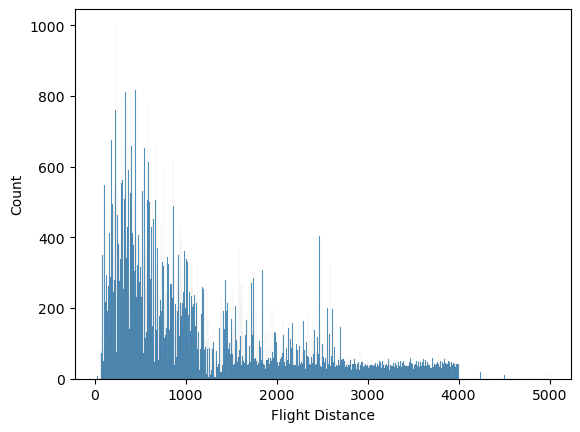

In [36]:
sns.histplot(data = air, x = 'Flight Distance', binwidth = 5)
plt.show()

In [38]:
air_copy = air.copy()

In [40]:
air_copy = air_copy.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'], axis =1)

In [42]:
air_copy.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,5,5,4,3,4,4,4,5,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,5,5,3,3,4,4,3,3,3,satisfied


In [45]:
dum_air = pd.get_dummies(air_copy, drop_first = True)
dum_air.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,70172,13,460,3,4,3,1,5,3,5,...,4,4,5,5,True,False,True,False,True,False
1,5047,25,235,3,2,3,3,1,3,1,...,3,1,4,1,True,True,False,False,False,False
2,110028,26,1142,2,2,2,2,5,5,5,...,4,4,4,5,False,False,False,False,False,True
3,24026,25,562,2,5,5,5,2,2,2,...,3,1,4,2,False,False,False,False,False,False
4,119299,61,214,3,3,3,3,4,5,5,...,4,3,3,3,True,False,False,False,False,True


In [46]:
X = dum_air.drop('satisfaction_satisfied', axis = 1)
y = dum_air['satisfaction_satisfied']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 23)

### Logic Regression

In [58]:
lr = LogisticRegression()

In [59]:
lr.fit(x_train, y_train)

LogisticRegression()

In [60]:
y_pred = lr.predict(X_test)

In [63]:
print(accuracy_score(y_test, y_pred))

0.7562876940844347
